In [14]:
import pandas as pd

from prophet import Prophet

df = pd.read_csv(r'C:\Users\cicic\OneDrive\Desktop\Barrios_Project\barrios\iss-data\csv\prophet_2cols\us_weekly_consumable_water_summary_20220102-20230903_d_2col.csv')

df.columns = ['ds', 'y']
df.head()


,ds,y
0,2022-01-14,2420.0
1,2022-01-21,2418.0
2,2022-01-28,2416.0
3,2022-02-04,2392.0
4,2022-02-11,2290.0


In [15]:
          
m = Prophet()
m.fit(df)

18:49:41 - cmdstanpy - INFO - Chain [1] start processing
18:49:41 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
# makes dataframe in the future 365 days
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
447,2024-09-01
448,2024-09-02
449,2024-09-03
450,2024-09-04
451,2024-09-05


In [17]:
#forcasting
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
447,2024-09-01,-5065.721087,-5278.677850,-4836.000947
448,2024-09-02,-5072.011033,-5299.272679,-4834.838562
449,2024-09-03,-5078.303136,-5300.942589,-4853.118780
450,2024-09-04,-1463.548013,-1679.048152,-1224.735333
451,2024-09-05,-5090.881205,-5329.003611,-4844.824342


c:\Users\cicic\OneDrive\Desktop\Barrios_Project\venv\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\cicic\OneDrive\Desktop\Barrios_Project\venv\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


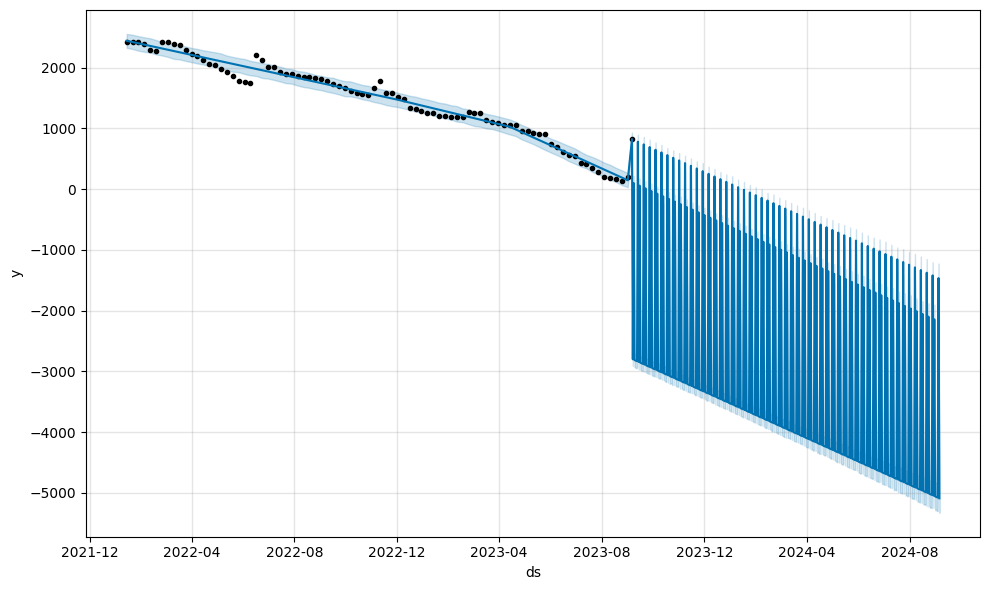

In [18]:
#plot
fig1 = m.plot(forecast)